import seaborn as sns
import matplotlib.pyplot as plt
# ^^^ pyforest auto-imports - don't write above this line
# Benford

In [463]:
!pwd

/c/Users/andreaguiar/Desktop/usr/dev/ironhack/ft202002/classes/week6_remote/6_Benford


In [1]:
import pandas as pd

In [2]:
# !pip install benford_py

In [392]:
df = pd.read_excel('https://github.com/rfordatascience/tidytuesday/blob/master/data/2018/2018-04-16/global_mortality.xlsx?raw=true')

In [393]:
import cufflinks as cf
cf.go_offline()

In [394]:
df.head()

,country,country_code,year,Cardiovascular diseases (%),Cancers (%),Respiratory diseases (%),Diabetes (%),Dementia (%),Lower respiratory infections (%),Neonatal deaths (%),...,Parkinson disease (%),Alcohol disorders (%),Intestinal infectious diseases (%),Drug disorders (%),Hepatitis (%),Fire (%),Heat-related (hot and cold exposure) (%),Natural disasters (%),Conflict (%),Terrorism (%)
0,Afghanistan,AFG,1990,17.610397,4.025975,2.106626,3.832555,0.531429,10.886362,9.184653,...,0.025159,0.028998,0.183330,0.041205,0.138738,0.174157,0.137823,0.000000,0.932,0.007
1,Afghanistan,AFG,1991,17.801807,4.054145,2.134176,3.822228,0.532497,10.356968,8.938897,...,0.025451,0.029172,0.178107,0.042033,0.135008,0.170671,0.134827,0.797603,2.044,0.040
2,Afghanistan,AFG,1992,18.386833,4.173959,2.208298,3.900125,0.540066,10.095546,8.841380,...,0.026122,0.029973,0.176855,0.043843,0.134582,0.171171,0.139053,0.340210,2.408,0.027
3,Afghanistan,AFG,1993,18.959646,4.269233,2.283923,3.974113,0.553813,9.873841,8.676409,...,0.027044,0.030456,0.173467,0.045350,0.133888,0.171032,0.150136,0.116263,NaN,NaN
4,Afghanistan,AFG,1994,19.089513,4.256034,2.307721,3.968954,0.550087,9.530242,8.384454,...,0.027180,0.030103,0.165135,0.045744,0.130486,0.167263,0.148970,0.075506,4.296,0.010


In [42]:
df.query('country == "Brazil" and year==2016').loc[:, 'Cardiovascular diseases (%)':].iplot(kind='barh')sorted

## Benford Law

Law that look at the first digits of your data:

![title](First_Digits.png)

Benford Law says: 

Law of Anomalous Numbers

$$ P(D_1 = d) = log\left(1 + \frac{1}{d}\right) $$

In [398]:
import numpy as np
d = 4
np.log10(1 + 1 / d)

0.09691001300805642

d ranging from 1 to 9

In [399]:
np.log10(1 + 1 / np.arange(1,10))

array([0.30103   , 0.17609126, 0.12493874, 0.09691001, 0.07918125,
       0.06694679, 0.05799195, 0.05115252, 0.04575749])

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

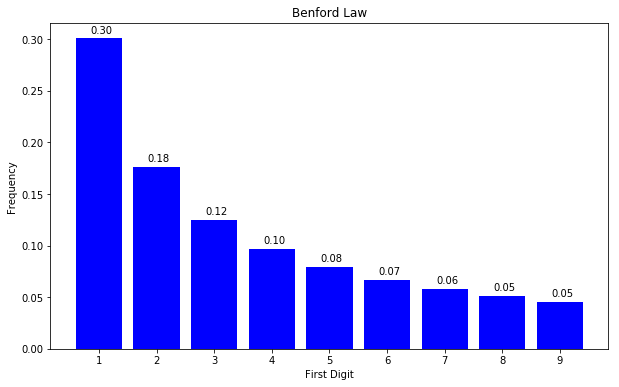

In [462]:
plt.figure(figsize=(10,6))
plt.bar(x = np.arange(1, 10) , 
        height = np.log10(1 + 1 / np.arange(1,10)), color='blue')

for i in np.arange(1, 10):
    plt.text(i - 0.15, np.log10(1 + 1/i)+0.005, f'{np.log10(1 + 1/i) :.2f}')

#plt.grid()
plt.xlabel('First Digit')
plt.ylabel('Frequency')
plt.title('Benford Law')
plt.xticks(np.arange(1,10));
plt.savefig('benford_freq.png')

Stuff that follows it:

- Physical constants
- Census data
- Lengths of the world's rivers

In [ ]:
from collections import Counter

In [ ]:
#pd.DataFrame(Counter(df['Suicide (%)'].apply(lambda x : str(x)[0]))).plot(kind='bar')

# Practical Applications: Fraud Detection

In [401]:
df = pd.read_csv('ibge_br.csv')

In [402]:
df.columns

Index(['IBGECode', 'LocalCidade', 'LocalUF', 'LocalEstado', 'RegiaoBrasil',
       'Latitude', 'Longitude', 'Gentilico', 'PopEstimada_2018',
       'PopCenso 2010', 'IDHM', 'ReceitasRealizadas_2014',
       'DespesasEmpenhadas_2014', 'Pib_2014', 'PopCenso 2010 ',
       ' PopCenso 2010'],
      dtype='object')

In [403]:
df.head()

,IBGECode,LocalCidade,LocalUF,LocalEstado,RegiaoBrasil,Latitude,Longitude,Gentilico,PopEstimada_2018,PopCenso 2010,IDHM,ReceitasRealizadas_2014,DespesasEmpenhadas_2014,Pib_2014,PopCenso 2010,PopCenso 2010
0,1100015,ALTA FLORESTA D'OESTE,RO,Rondonia,N,-119283,-619953,alta-florense,23167,24392.0,"0,641",53490,47577,16461.11,42354,24392
1,1100023,ARIQUEMES,RO,Rondonia,N,-990571,-630325,ariquemense,106168,90353.0,"0,702",0,0,19401.43,104279,90353
2,1100031,CABIXI,RO,Rondonia,N,-134945,-60552,cabixiense,5438,6313.0,"0,65",22635,19354,18346.17,11803,6313
3,1100049,CACOAL,RO,Rondonia,N,-114343,-614562,cacoalense,84813,78574.0,"0,718",169636,155473,20725.23,94316,78574
4,1100056,CEREJEIRAS,RO,Rondonia,N,-13187,-608168,cerejeirense,16444,17029.0,"0,692",53147,46774,22179.17,31870,17029


In this dataset, we have two `PopCenso 2010` columns. One from the original data, another one I have faked.

In [406]:
from benford import first_digits


Initialized sequence with 5564 registries.

Test performed on 5564 registries.
Discarded 0 records < 1 after preparation.


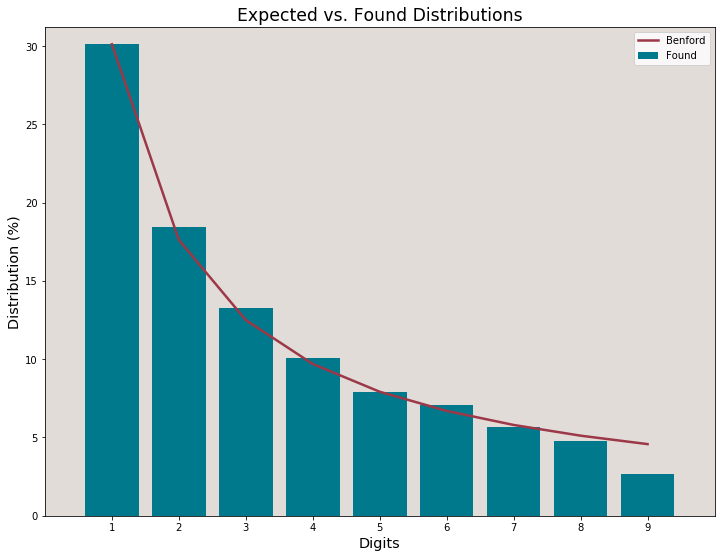

,Counts,Found,Expected
First_1_Dig,,,
1,1676,0.301222,0.301030
2,1025,0.184220,0.176091
3,739,0.132818,0.124939
4,562,0.101006,0.096910
5,440,0.079080,0.079181
6,392,0.070453,0.066947
7,316,0.056794,0.057992
8,264,0.047448,0.051153
9,150,0.026959,0.045757


In [408]:
first_digits(df[' PopCenso 2010'], 1)


Initialized sequence with 5570 registries.

Test performed on 5570 registries.
Discarded 0 records < 1 after preparation.


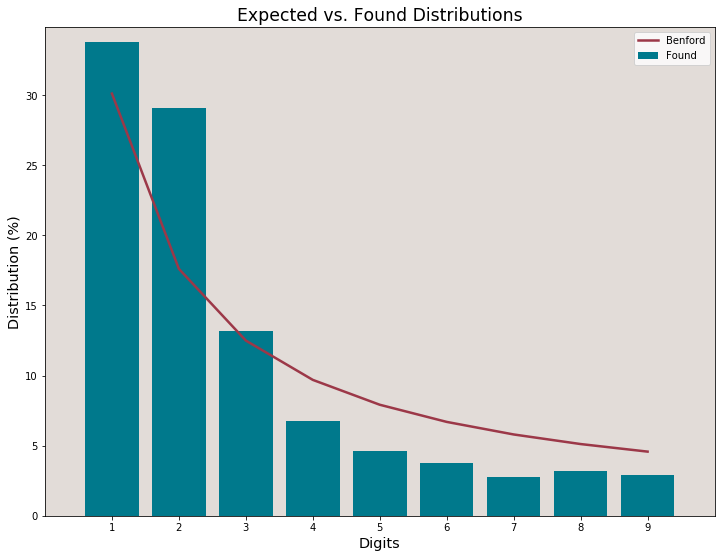

,Counts,Found,Expected
First_1_Dig,,,
1,1881,0.337702,0.301030
2,1619,0.290664,0.176091
3,733,0.131598,0.124939
4,375,0.067325,0.096910
5,256,0.045961,0.079181
6,211,0.037882,0.066947
7,155,0.027828,0.057992
8,177,0.031777,0.051153
9,163,0.029264,0.045757


In [409]:
first_digits(df['PopCenso 2010 '], 1)

In [411]:
df = pd.read_excel('https://github.com/rfordatascience/tidytuesday/blob/master/data/2018/2018-04-16/global_mortality.xlsx?raw=true')

INFO:root:year



Initialized sequence with 6156 registries.

Test performed on 6156 registries.
Discarded 0 records < 1 after preparation.


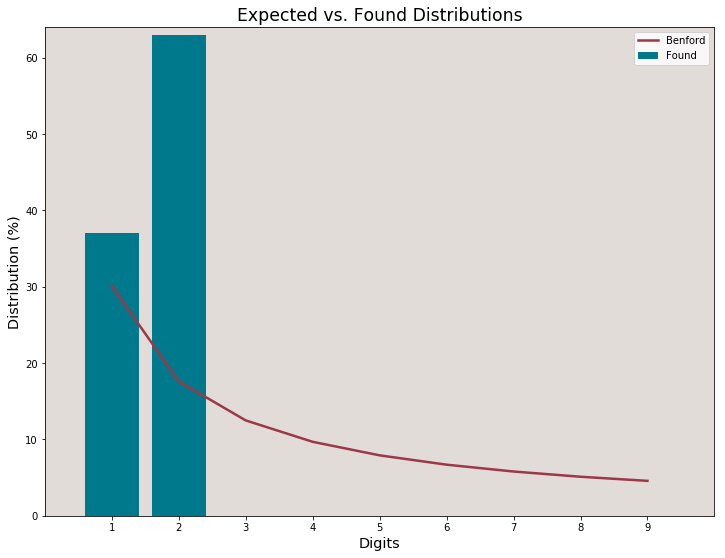

INFO:root:Cardiovascular diseases (%)



Initialized sequence with 6156 registries.

Test performed on 6156 registries.
Discarded 0 records < 1 after preparation.


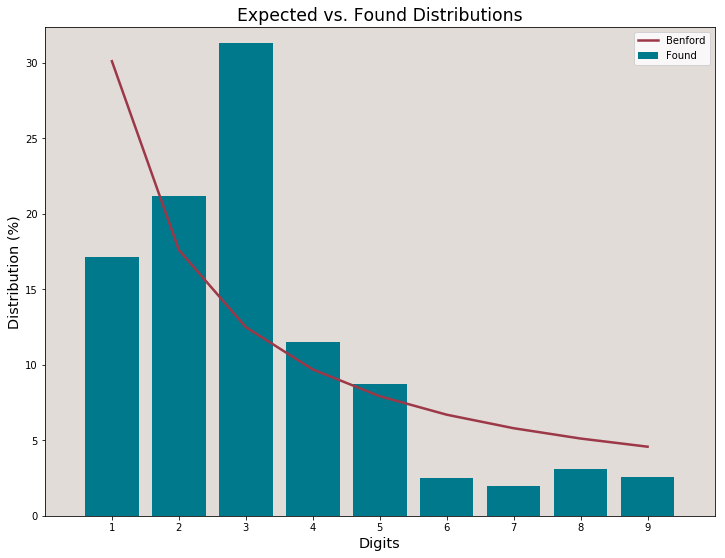

INFO:root:Cancers (%)



Initialized sequence with 6156 registries.

Test performed on 6156 registries.
Discarded 0 records < 1 after preparation.


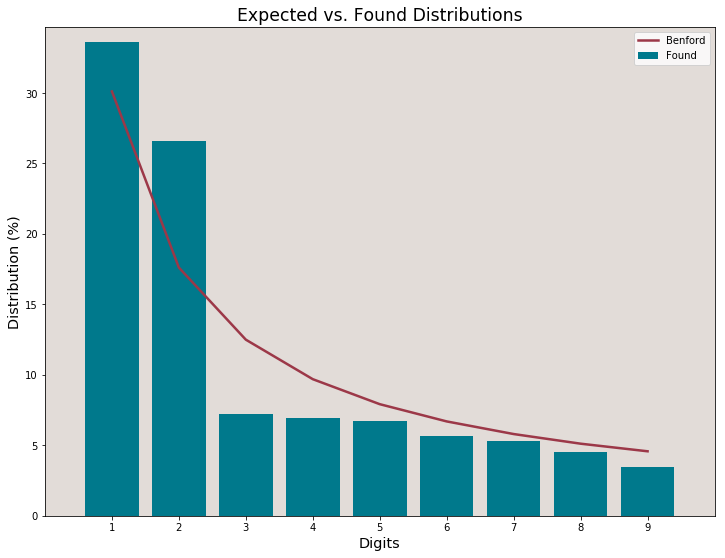

INFO:root:Respiratory diseases (%)



Initialized sequence with 6156 registries.

Test performed on 6156 registries.
Discarded 0 records < 1 after preparation.


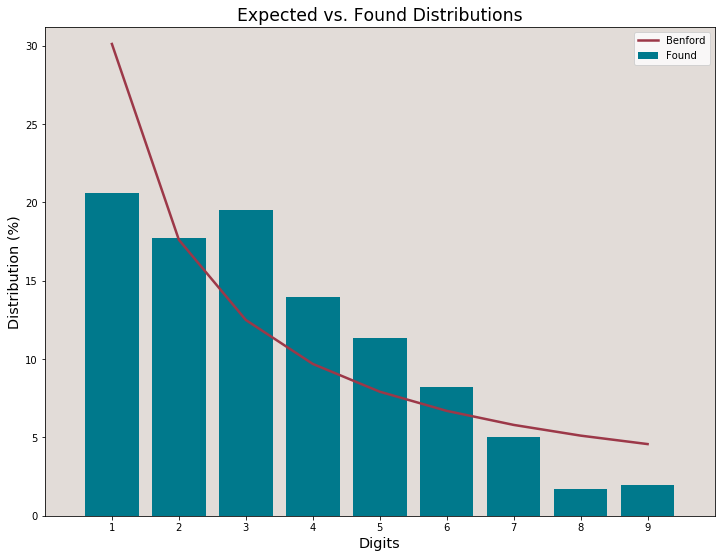

INFO:root:Diabetes (%)



Initialized sequence with 6156 registries.

Test performed on 6156 registries.
Discarded 0 records < 1 after preparation.


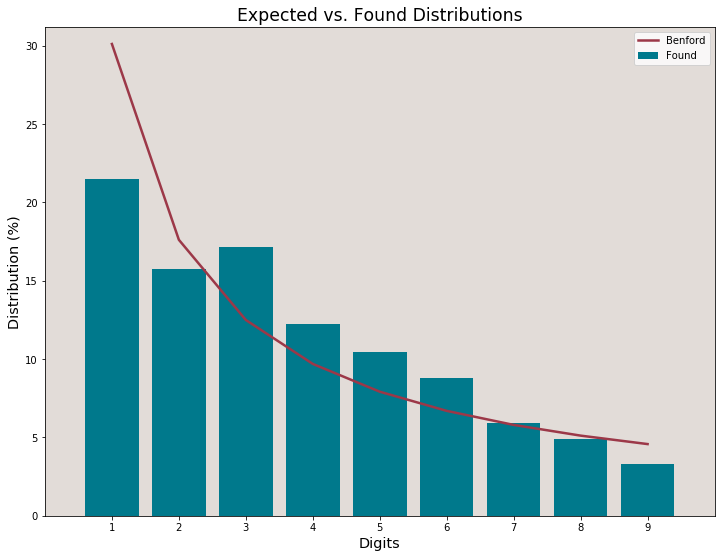

INFO:root:Dementia (%)



Initialized sequence with 6156 registries.

Test performed on 6156 registries.
Discarded 0 records < 1 after preparation.


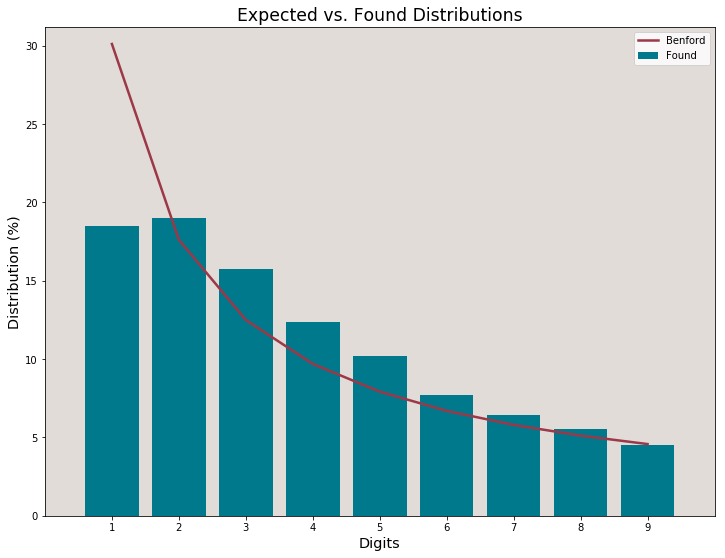

INFO:root:Lower respiratory infections (%)



Initialized sequence with 6156 registries.

Test performed on 6156 registries.
Discarded 0 records < 1 after preparation.


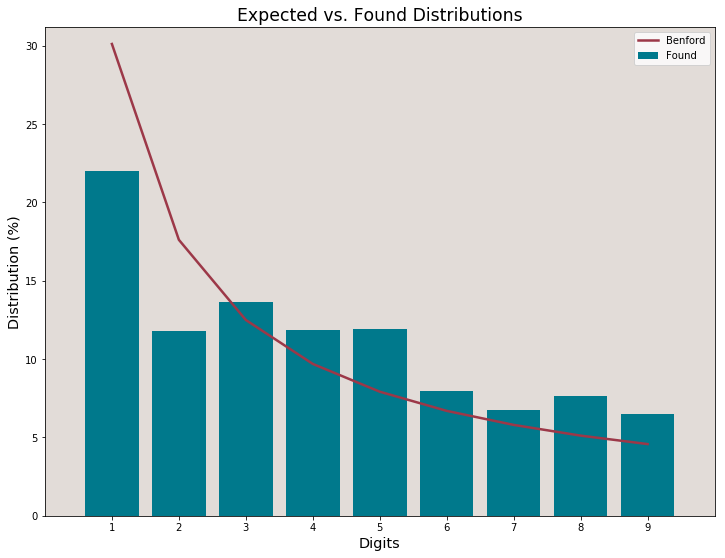

INFO:root:Neonatal deaths (%)



Initialized sequence with 6156 registries.

Test performed on 6156 registries.
Discarded 0 records < 1 after preparation.


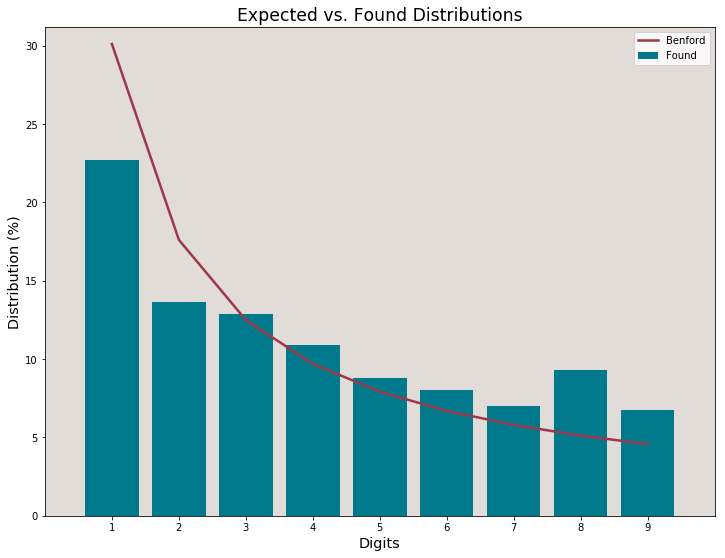

INFO:root:Diarrheal diseases (%)



Initialized sequence with 6156 registries.

Test performed on 6139 registries.
Discarded 17 records < 1 after preparation.


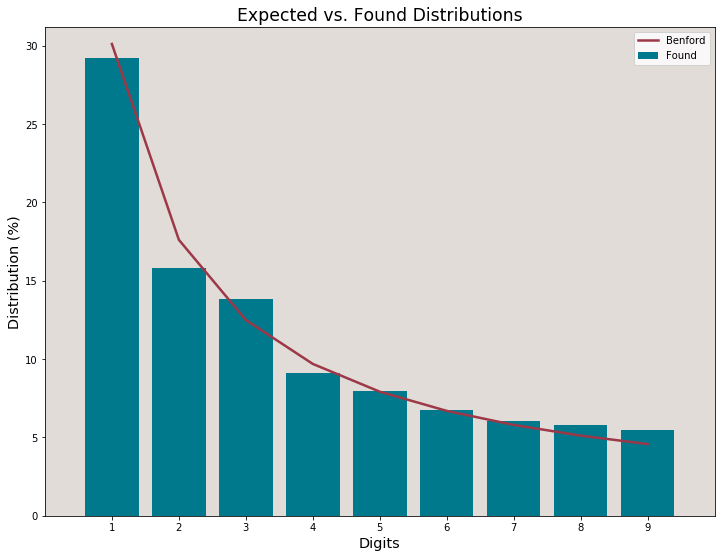

INFO:root:Road accidents (%)



Initialized sequence with 6156 registries.

Test performed on 6156 registries.
Discarded 0 records < 1 after preparation.


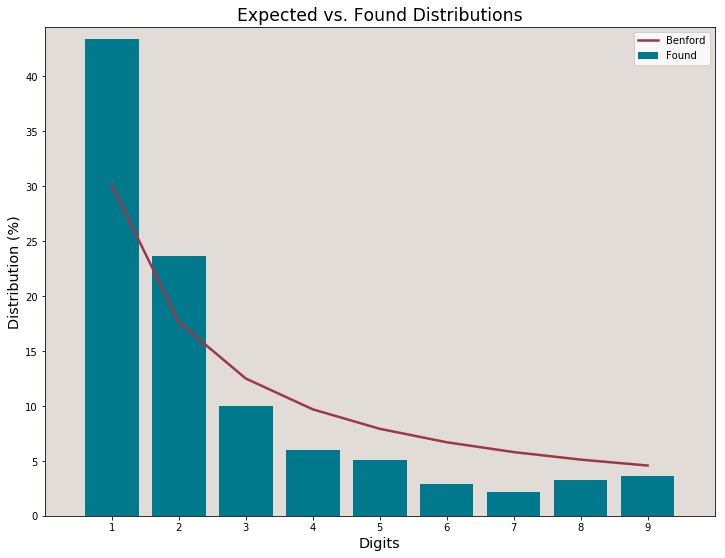

INFO:root:Liver disease (%)



Initialized sequence with 6156 registries.

Test performed on 6156 registries.
Discarded 0 records < 1 after preparation.


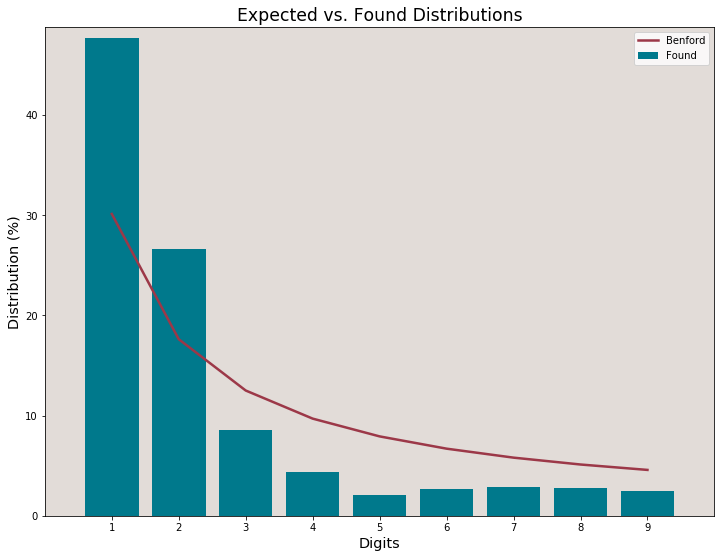

INFO:root:Tuberculosis (%)



Initialized sequence with 6156 registries.

Test performed on 6156 registries.
Discarded 0 records < 1 after preparation.


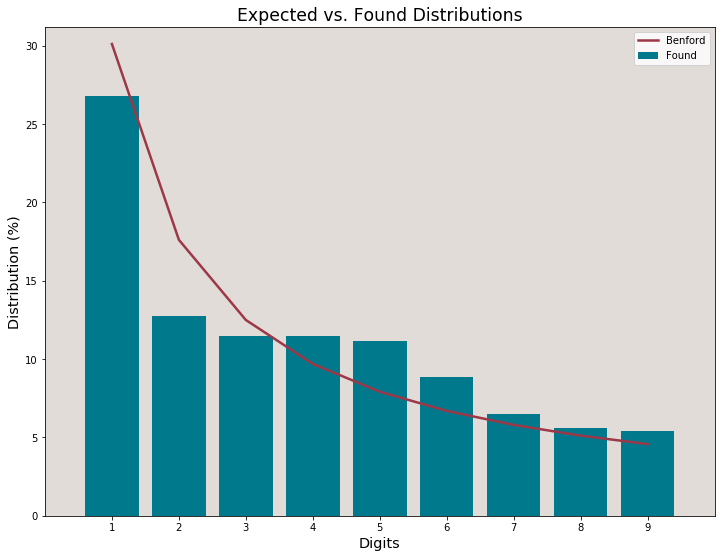

INFO:root:Kidney disease (%)



Initialized sequence with 6156 registries.

Test performed on 6156 registries.
Discarded 0 records < 1 after preparation.


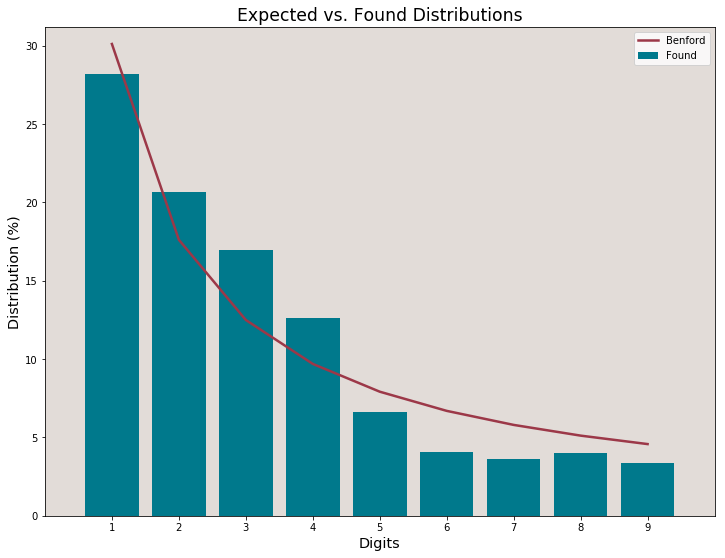

INFO:root:Digestive diseases (%)



Initialized sequence with 6156 registries.

Test performed on 6156 registries.
Discarded 0 records < 1 after preparation.


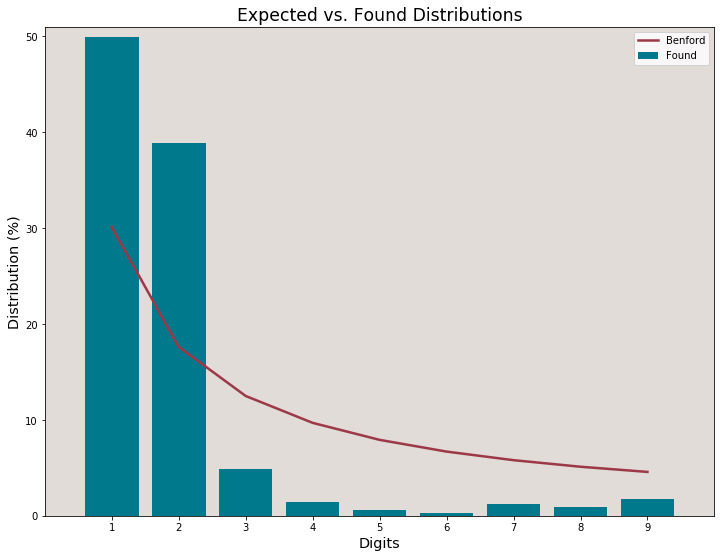

INFO:root:HIV/AIDS (%)



Initialized sequence with 6152 registries.

Test performed on 5938 registries.
Discarded 214 records < 1 after preparation.


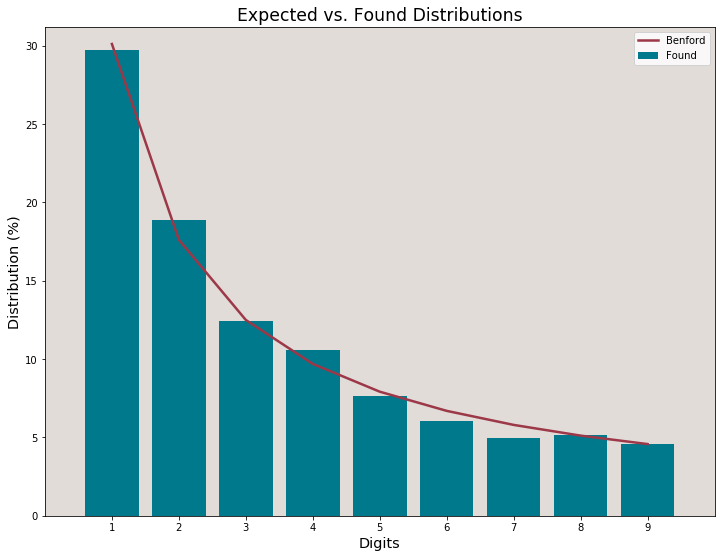

INFO:root:Suicide (%)



Initialized sequence with 6156 registries.

Test performed on 6156 registries.
Discarded 0 records < 1 after preparation.


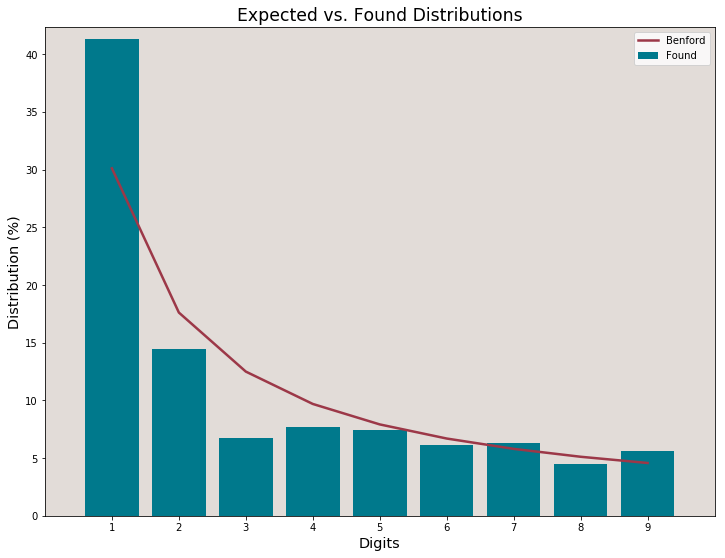

INFO:root:Malaria (%)



Initialized sequence with 3616 registries.

Test performed on 2631 registries.
Discarded 985 records < 1 after preparation.


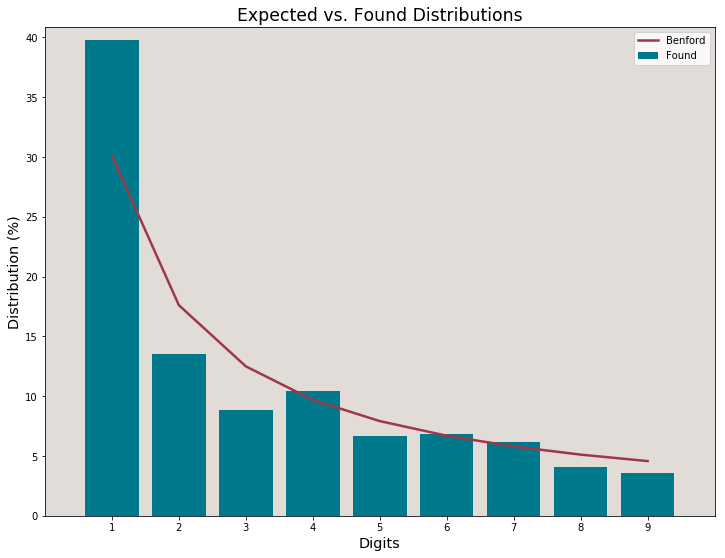

INFO:root:Homicide (%)



Initialized sequence with 6156 registries.

Test performed on 6156 registries.
Discarded 0 records < 1 after preparation.


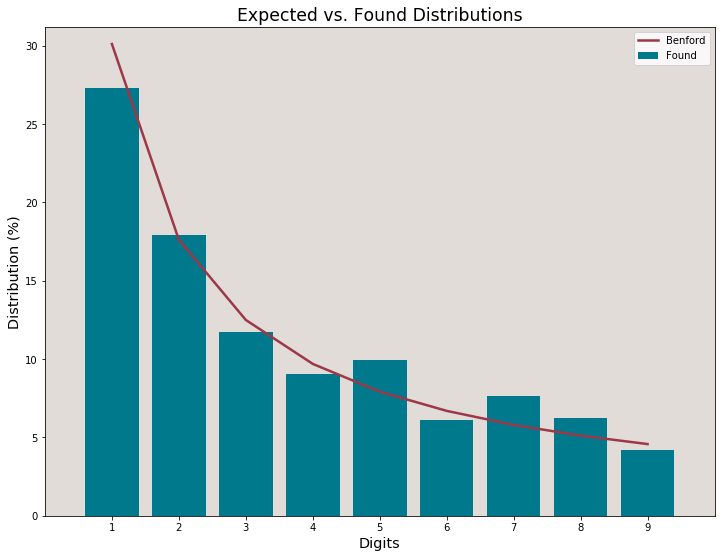

INFO:root:Nutritional deficiencies (%)



Initialized sequence with 6156 registries.

Test performed on 6028 registries.
Discarded 128 records < 1 after preparation.


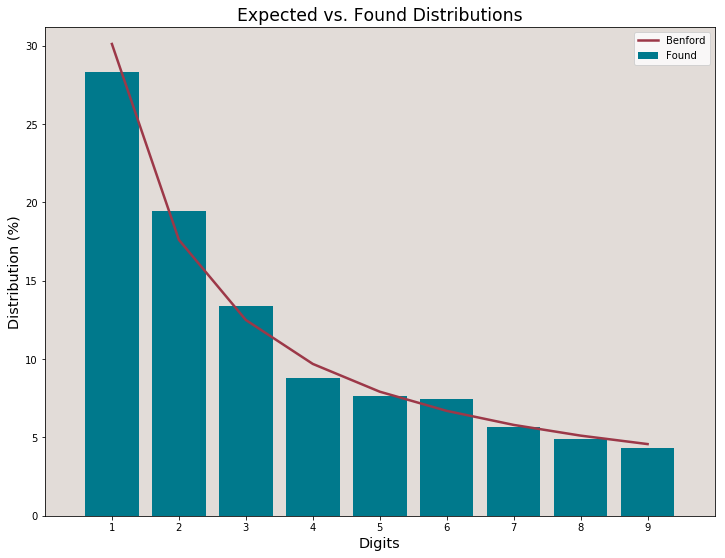

INFO:root:Meningitis (%)



Initialized sequence with 6156 registries.

Test performed on 6156 registries.
Discarded 0 records < 1 after preparation.


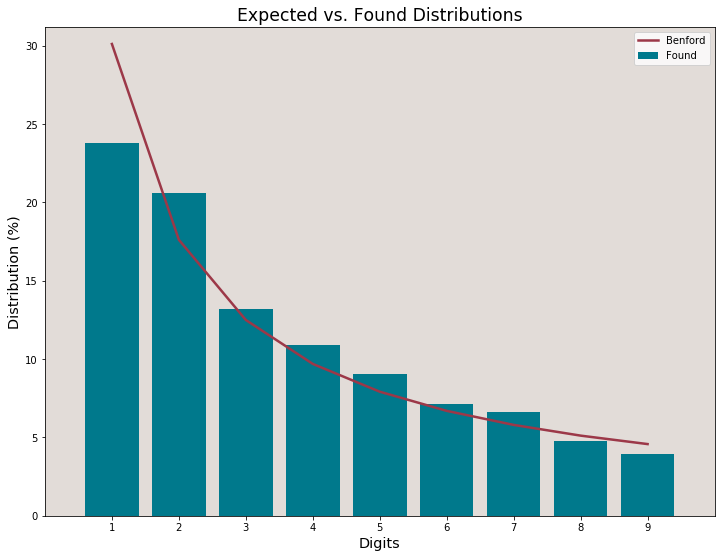

INFO:root:Protein-energy malnutrition (%)



Initialized sequence with 6156 registries.

Test performed on 5623 registries.
Discarded 533 records < 1 after preparation.


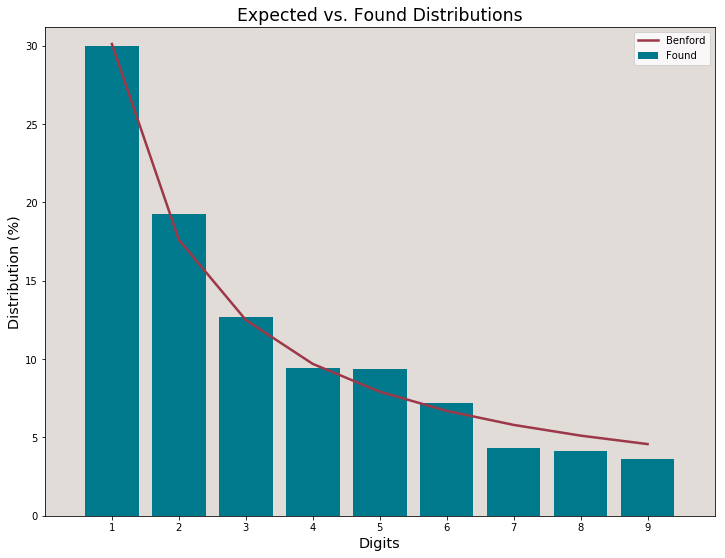

INFO:root:Drowning (%)



Initialized sequence with 6156 registries.

Test performed on 6156 registries.
Discarded 0 records < 1 after preparation.


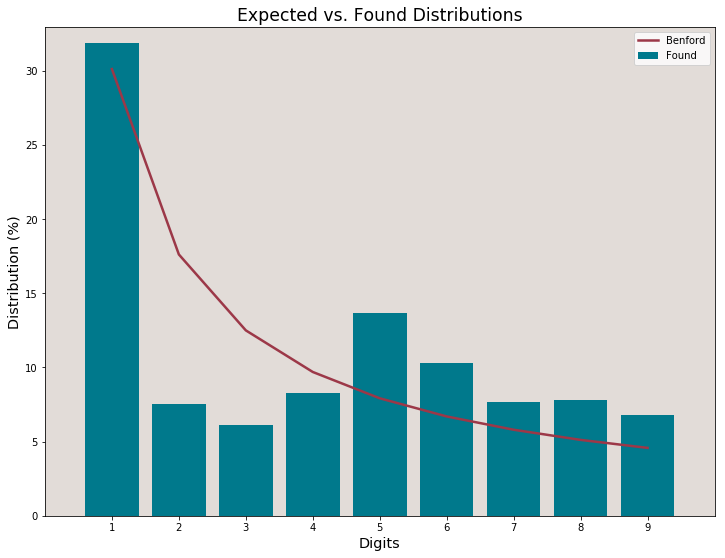

INFO:root:Maternal deaths (%)



Initialized sequence with 6156 registries.

Test performed on 5561 registries.
Discarded 595 records < 1 after preparation.


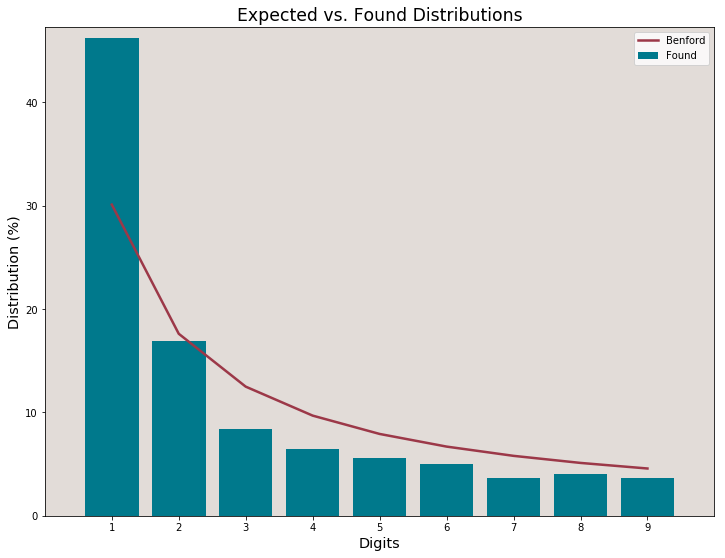

INFO:root:Parkinson disease (%)



Initialized sequence with 6156 registries.

Test performed on 6155 registries.
Discarded 1 records < 1 after preparation.


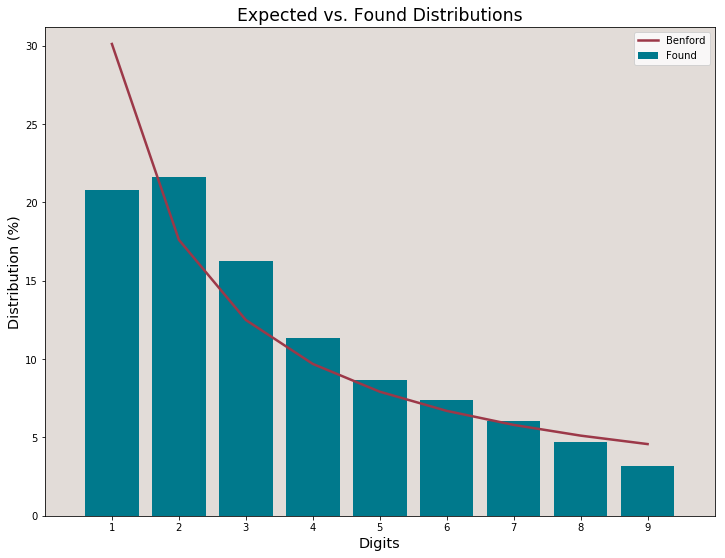

INFO:root:Alcohol disorders (%)



Initialized sequence with 6156 registries.

Test performed on 6156 registries.
Discarded 0 records < 1 after preparation.


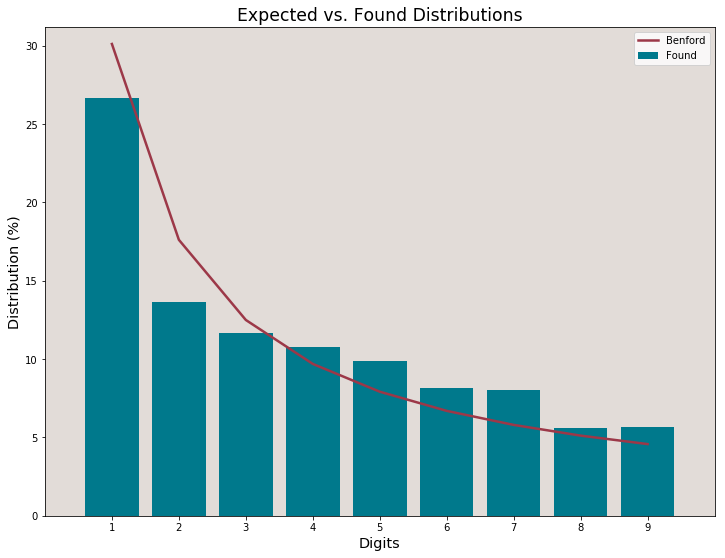

INFO:root:Intestinal infectious diseases (%)



Initialized sequence with 6156 registries.

Test performed on 3186 registries.
Discarded 2970 records < 1 after preparation.


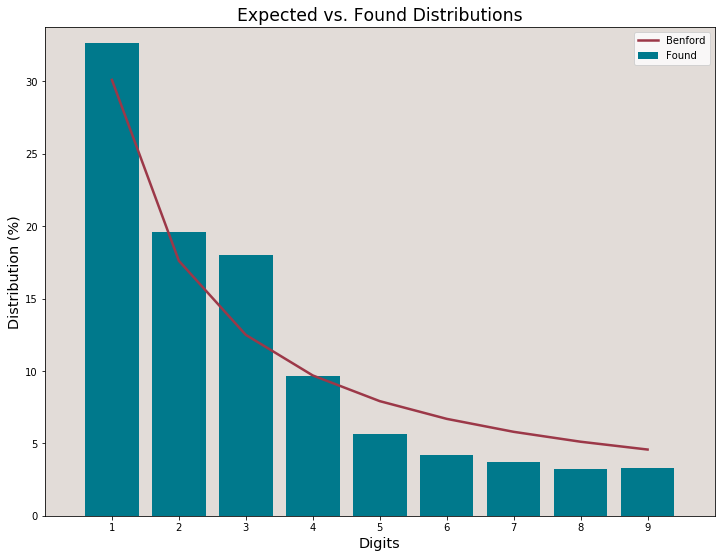

INFO:root:Drug disorders (%)



Initialized sequence with 6156 registries.

Test performed on 6062 registries.
Discarded 94 records < 1 after preparation.


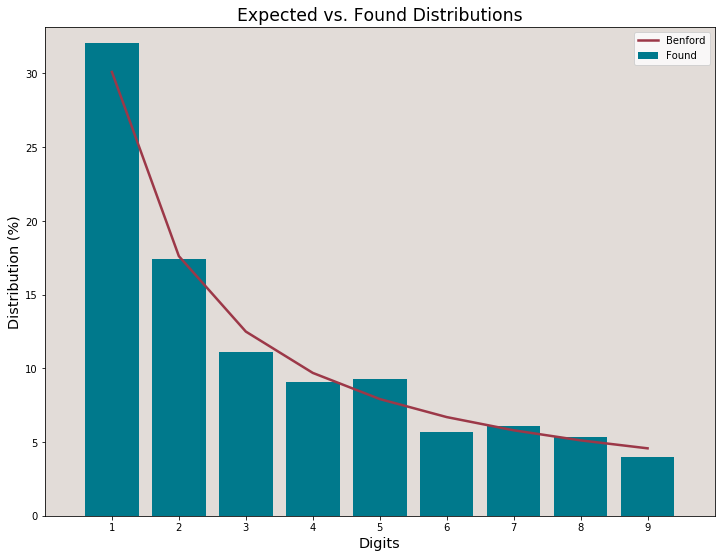

INFO:root:Hepatitis (%)



Initialized sequence with 6156 registries.

Test performed on 5941 registries.
Discarded 215 records < 1 after preparation.


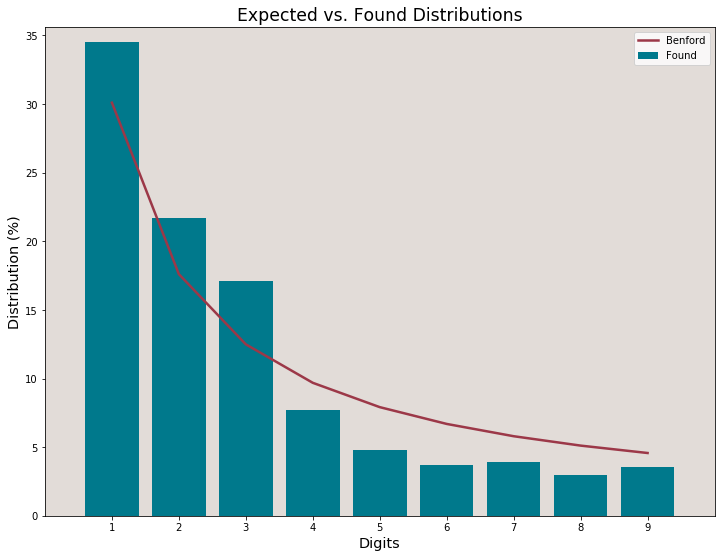

INFO:root:Fire (%)



Initialized sequence with 6156 registries.

Test performed on 6156 registries.
Discarded 0 records < 1 after preparation.


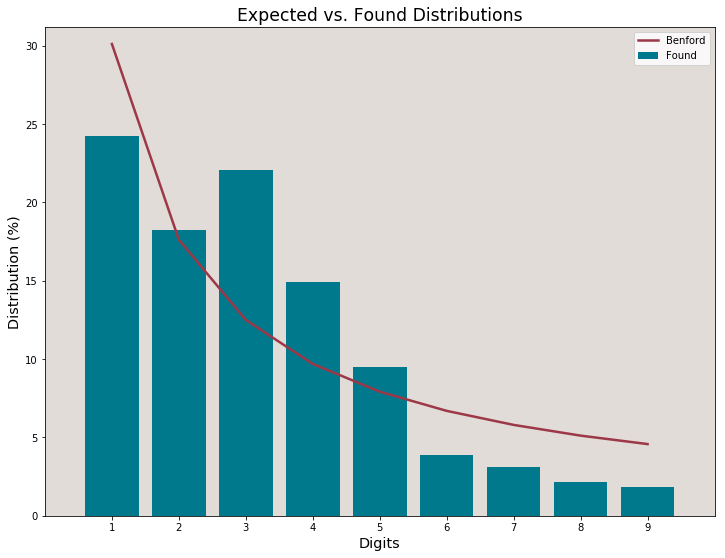

INFO:root:Heat-related (hot and cold exposure) (%)



Initialized sequence with 6156 registries.

Test performed on 6066 registries.
Discarded 90 records < 1 after preparation.


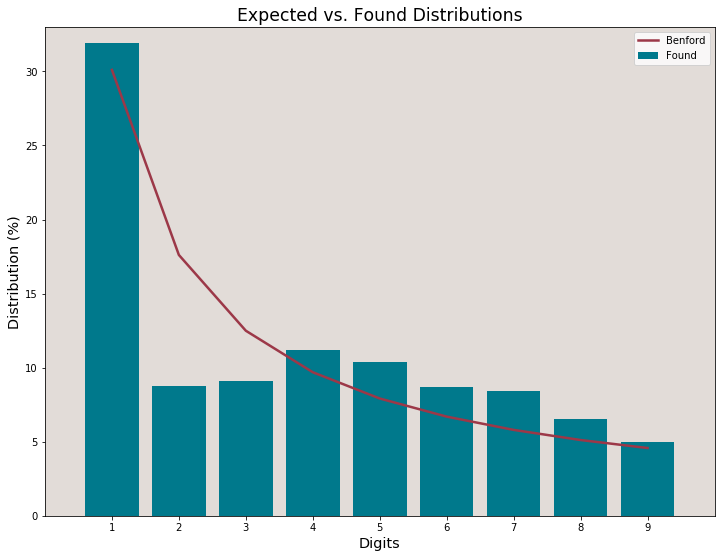

INFO:root:Natural disasters (%)



Initialized sequence with 2187 registries.

Test performed on 1833 registries.
Discarded 354 records < 1 after preparation.


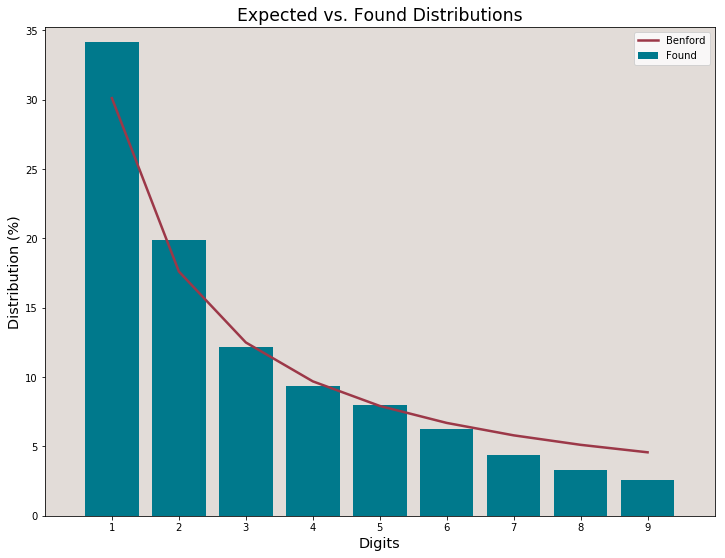

INFO:root:Conflict (%)



Initialized sequence with 1469 registries.

Test performed on 1315 registries.
Discarded 154 records < 1 after preparation.


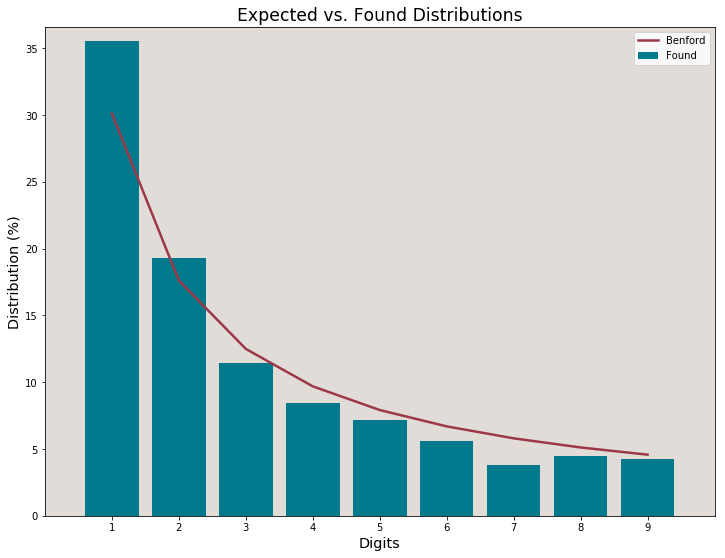

INFO:root:Terrorism (%)



Initialized sequence with 1686 registries.

Test performed on 900 registries.
Discarded 786 records < 1 after preparation.


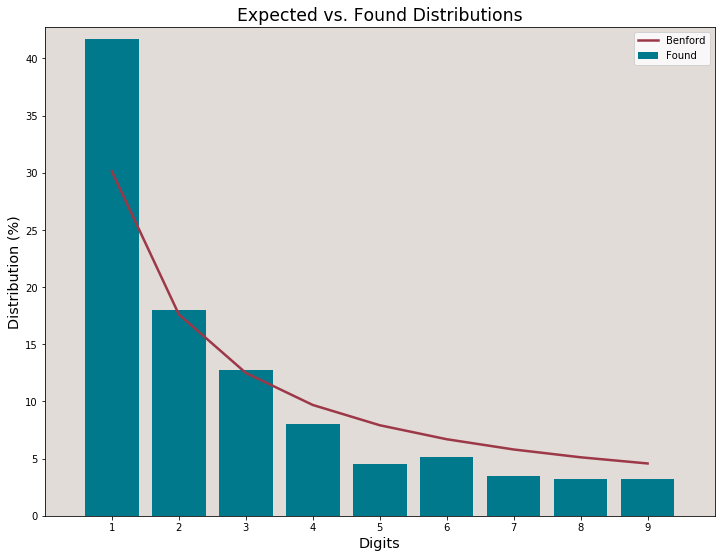

In [412]:
import logging
logging.basicConfig(level=logging.INFO)

for col in df.select_dtypes(exclude='object').columns:
    logging.info(col)
    first_digits(df[col], 1)


In [413]:
def plot_bf(url):
    df = pd.read_csv(url)

    for col in df.select_dtypes(exclude='object').columns:
        logging.info(col)
        first_digits(df[col], 1, 'infer')

INFO:root:consumption



Initialized sequence with 1399 registries.

Test performed on 1399 registries.
Discarded 0 records < 1 after preparation.


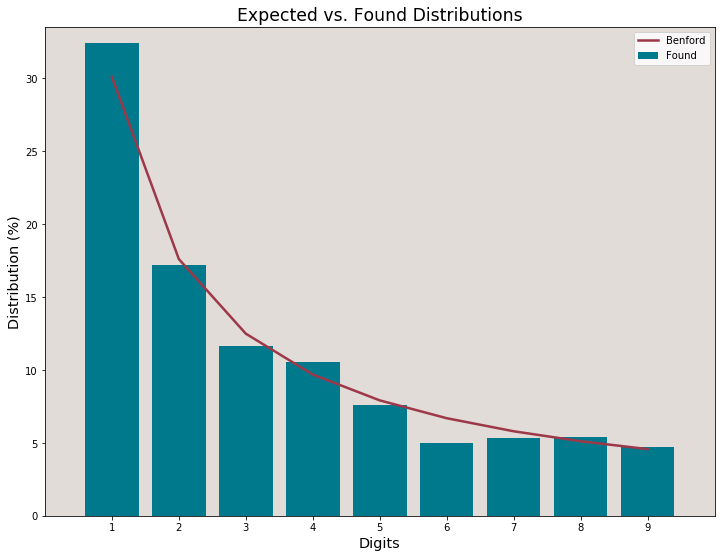

INFO:root:co2_emmission



Initialized sequence with 1386 registries.

Test performed on 1386 registries.
Discarded 0 records < 1 after preparation.


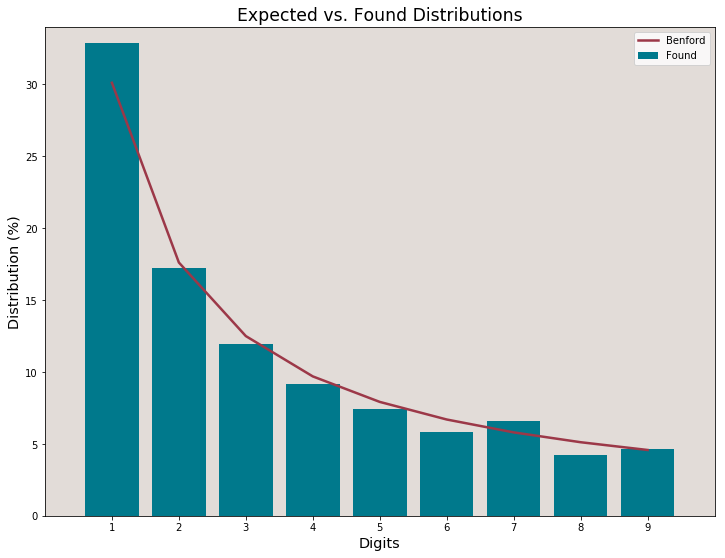

In [414]:
url = 'https://raw.githubusercontent.com/rfordatascience/tidytuesday/master/data/2020/2020-02-18/food_consumption.csv'
plot_bf(url)

INFO:root:number



Initialized sequence with 26688 registries.

Test performed on 26688 registries.
Discarded 0 records < 1 after preparation.


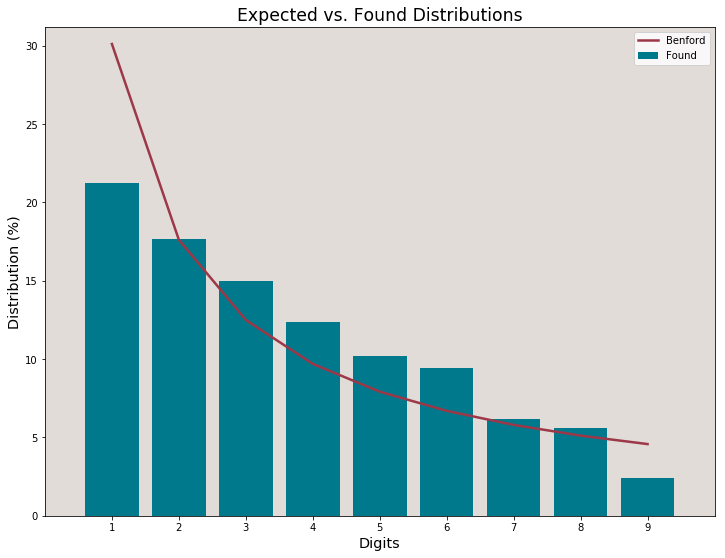

INFO:root:price



Initialized sequence with 23593 registries.

Test performed on 23593 registries.
Discarded 0 records < 1 after preparation.


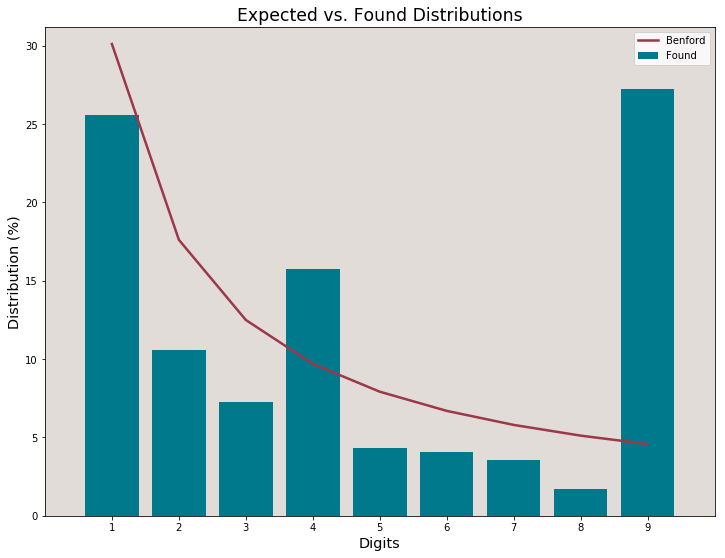

INFO:root:average_playtime



Initialized sequence with 922 registries.

Test performed on 922 registries.
Discarded 0 records < 1 after preparation.


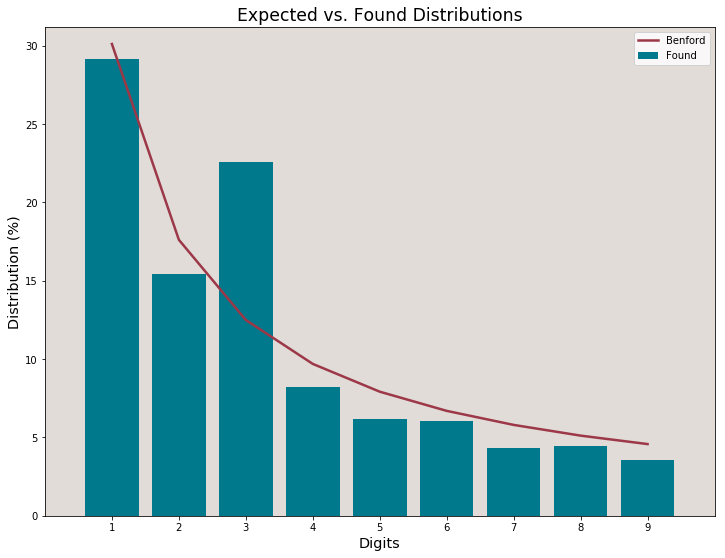

INFO:root:median_playtime



Initialized sequence with 851 registries.

Test performed on 851 registries.
Discarded 0 records < 1 after preparation.


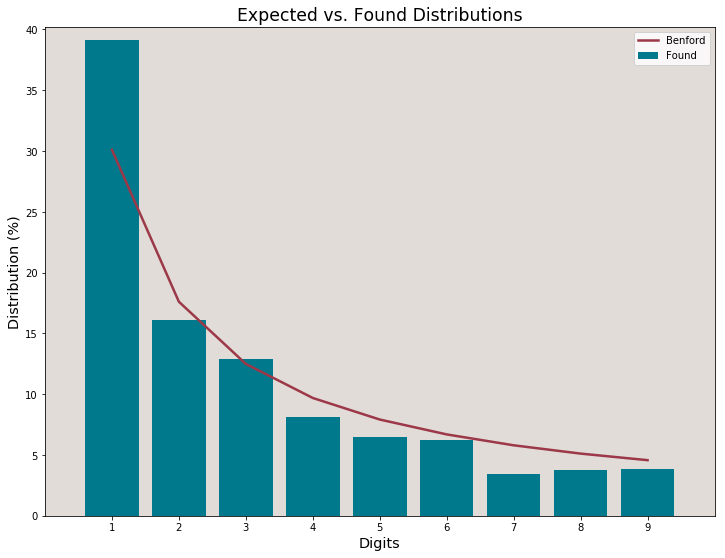

INFO:root:metascore



Initialized sequence with 2850 registries.

Test performed on 2850 registries.
Discarded 0 records < 1 after preparation.


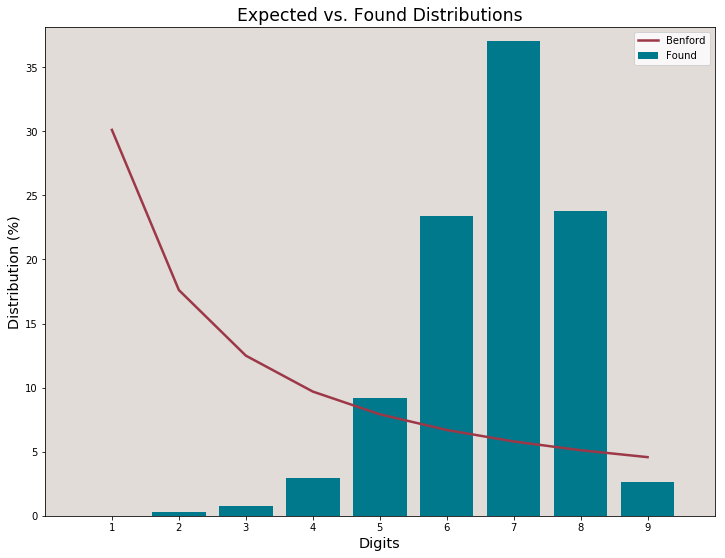

In [415]:
url = 'https://raw.githubusercontent.com/rfordatascience/tidytuesday/master/data/2019/2019-07-30/video_games.csv'
plot_bf(url)


# Zipf's Law

In [358]:
!pip install nltk

  Created wheel for nltk: filename=nltk-3.4.5-py3-none-any.whl size=1449913 sha256=9fa40870648b40d1c9d829c0b6ed7a03dd4a5e2c57d22c249b96ecd37ca26ef1
  Stored in directory: c:\users\andreaguiar\appdata\local\pip\cache\wheels\48\8b\7f\473521e0c731c6566d631b281f323842bbda9bd819eb9a3ead
Successfully built nltk


In [359]:
import nltk

In [365]:
nltk.download()

showing info https://raw.githubusercontent.com/nltk/nltk_data/gh-pages/index.xml


True

In [366]:
nltk.corpus.gutenberg.fileids()

['austen-emma.txt',
 'austen-persuasion.txt',
 'austen-sense.txt',
 'bible-kjv.txt',
 'blake-poems.txt',
 'bryant-stories.txt',
 'burgess-busterbrown.txt',
 'carroll-alice.txt',
 'chesterton-ball.txt',
 'chesterton-brown.txt',
 'chesterton-thursday.txt',
 'edgeworth-parents.txt',
 'melville-moby_dick.txt',
 'milton-paradise.txt',
 'shakespeare-caesar.txt',
 'shakespeare-hamlet.txt',
 'shakespeare-macbeth.txt',
 'whitman-leaves.txt']

In [430]:
shakespeare = nltk.corpus.gutenberg.words('austen-emma.txt')

In [419]:
shakespeare

['[', 'The', 'Tragedie', 'of', 'Hamlet', 'by', ...]

In [431]:
shakespeare = [word.lower() for word in shakespeare]

In [432]:
from collections import Counter

counter = Counter(shakespeare)

In [433]:
shakes = pd.DataFrame(counter.items(), columns=['word','freq']).sort_values(by='freq', ascending=False)

In [434]:
shakes.head(10)

,word,freq
11,",",11454
47,.,6928
23,to,5239
27,the,5201
14,and,4896
26,of,4291
8,i,3178
17,a,3129
105,it,2528
46,her,2469


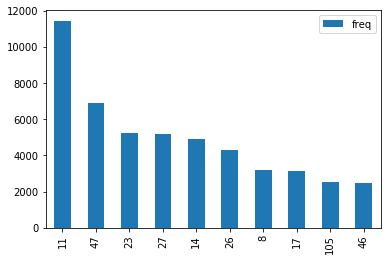

In [435]:
shakes.head(10).plot(kind='bar')